### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

    '': {
        'name': '',
        'color':'',
        'linestyle' : '',
        'linewidth' : '',
    },
    

## define m3dict

In [39]:
m3dict = {
    '1A': {'name': '','color':'darkgray','linestyle' : '-','linewidth' : 1,},
    '1AM2': {'name': '','color':'darkgray','linestyle' : ':','linewidth' : 1,},
    '1AM3': {'name': '','color':'darkgray','linestyle' : '--','linewidth' : 1,},
    '1AEM': {'name': 'SSP 1-2.6 \n HIST. OZONE','color':'darkgray','linestyle' : '-','linewidth' : 2.5,},

    '1B': {'name': '','color':'black','linestyle' : '-','linewidth' : 1,},
    '1BM2': {'name': '','color':'black','linestyle' : ':','linewidth' : 1,},
    '1BM3': {'name': '','color':'black','linestyle' : '--','linewidth' : 1,},
    '1BEM': {'name': 'SSP 3-7.0 \n HIST. OZONE','color':'black','linestyle' : '-','linewidth' : 2.5,},
    
    '2A': {'name': '','color':'mediumaquamarine','linestyle' : '-','linewidth' : 1,},
    '2AM2': {'name': '','color':'mediumaquamarine','linestyle' : ':','linewidth' : 1,},
    '2AM3': {'name': '','color':'mediumaquamarine','linestyle' : '--','linewidth' : 1,},
    '2AEM': {'name': 'SSP 1-2.6 \n NO HOLE','color':'mediumaquamarine','linestyle' : '-','linewidth' : 2.5,},

    '2B': {'name': '','color':'forestgreen','linestyle' : '-','linewidth' : 1,},
    '2BM2': {'name': '','color':'forestgreen','linestyle' : ':','linewidth' : 1,},
    '2BM3': {'name': '','color':'forestgreen','linestyle' : '--','linewidth' : 1,},
    '2BEM': {'name': 'SSP 3-7.0 \n NO HOLE','color':'forestgreen','linestyle' : '-','linewidth' : 2.5,},    
}

Text(0.5, 0.98, 'yearly wind speed')

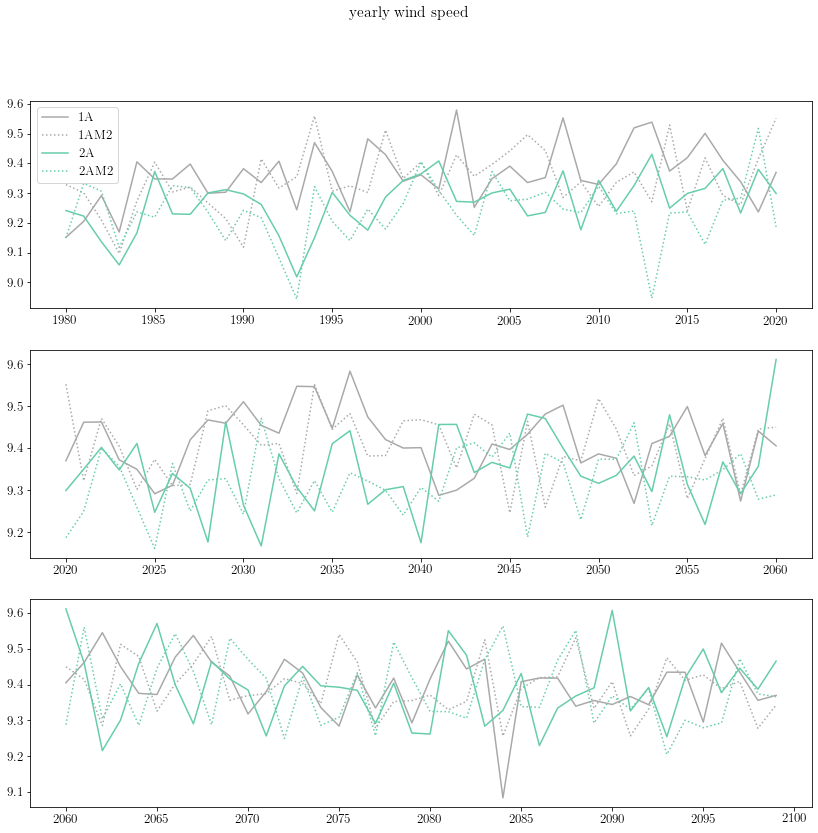

In [5]:
scens = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
scens = ['2A','2AM2','2AEM','1A','1AM2','1AEM','2B','2BM2','2BEM','1B','1BM2','1BEM']
stl = ['1AEM','2AEM','1BEM','2BEM']
#scens = ['1A','2A','1B','2B']

scens = ['2AM2','2BM2','1A','1B','2A','2B','1AM2','1BM2']#,'1AEM','2AEM','1BEM','2BEM']
#scens = ['1AEM','2AEM','1BEM','2BEM']

scens = ['1A','1AM2','2A','2AM2']
fact = 1
fig, axs = plt.subplots(3,1, figsize=(14*fact, 13*fact), sharex=False, sharey=False)
axs = axs.ravel()


# ts = ['DJF','MAM','JJA','SON']

for s in scens:

    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    td = xr.open_dataset(f'{tdir}/scen{s}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
    g = td.resample(time_counter="Y").mean()
    
    times = pd.date_range(f"{1950}/01/01",f"{2100}/01/01",freq='YS',closed='left')

    g['time_counter'] = times
    
    g2 = g.sel(time_counter=slice(f'{1980}-01-01', f'{2020}-12-31'))
    axs[0].plot(g2.time_counter, g2.wspd10m, color = m3dict[s]['color'], linestyle = m3dict[s]['linestyle'],\
               label = s)
    
    g2 = g.sel(time_counter=slice(f'{2020}-01-01', f'{2060}-12-31'))
    axs[1].plot(g2.time_counter, g2.wspd10m, color = m3dict[s]['color'], linestyle = m3dict[s]['linestyle'])
    #g = td.groupby('time_counter.year').mean()

    g2 = g.sel(time_counter=slice(f'{2060}-01-01', f'{2100}-12-31'))
    axs[2].plot(g2.time_counter, g2.wspd10m, color = m3dict[s]['color'], linestyle = m3dict[s]['linestyle'])
    #g = td.groupby('time_counter.year').mean()

axs[0].legend()

plt.suptitle('yearly wind speed')

## spatial trends

## shoved in extract_2d_seas_NOZONE.py

In [6]:
import numpy as np

ex = False

def make_yearlist(yrst, yrend, scen, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/UKESM3M/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/scen{scen}_UKESM_wind_daily_1x1_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


if ex:
    savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(savenam)
    tmask = cdomask.tmask

    sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

    scens = ['2A','2AM2','1A','1AM2','2B','2BM2','1B','1BM2']



    starts = [1980,2020,2060]
    ends = [2019,2059,2099]

    for s in scens:
        for y in range(0,3):
            st = starts[y]; en = ends[y]
            #print(f'{s} {st}-{en}')
            print(f'scen{s}_2d-seas-wspd-ts-{st}-{en}.nc')

            ds = xr.open_mfdataset(make_yearlist(st, en, s))

            ds_DJF = ds.wspd10m.sel(time_counter=slice(f'{st}-01-01', f'{en+1}-01-01')).\
            sel(time_counter=(ds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()

            ds_MAM = ds.wspd10m.sel(time_counter=slice(f'{st}-01-01', f'{en+1}-01-01')).\
            sel(time_counter=(ds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()

            ds_JJA = ds.wspd10m.sel(time_counter=slice(f'{st}-01-01', f'{en+1}-01-01')).\
            sel(time_counter=(ds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()

            ds_SON = ds.wspd10m.sel(time_counter=slice(f'{st}-01-01', f'{en+1}-01-01')).\
            sel(time_counter=(ds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

            ds_FY = ds.wspd10m.sel(time_counter=slice(f'{st}-01-01', f'{en+1}-01-01')).groupby('time_counter.year').mean()

            new_ds = xr.Dataset({
                'DJF': ds_DJF,
                'MAM': ds_MAM,
                'JJA': ds_JJA,
                'SON': ds_SON,
                'FY': ds_FY,

            })

            new_ds.to_netcdf(f'{sdir}/scen{s}_2d-seas-wspd-ts-{st}-{en}.nc')

In [7]:
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

w = xr.open_dataset(f'{tdir}/scen2A_2d-seas-wspd-ts-1980-2019.nc')
s2A_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen2AM2_2d-seas-wspd-ts-1980-2019.nc')
s2AM2_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen1A_2d-seas-wspd-ts-1980-2019.nc')
s1A_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen1AM2_2d-seas-wspd-ts-1980-2019.nc')
s1AM2_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))

w = xr.open_dataset(f'{tdir}/scen2B_2d-seas-wspd-ts-1980-2019.nc')
s2B_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen2BM2_2d-seas-wspd-ts-1980-2019.nc')
s2BM2_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen1B_2d-seas-wspd-ts-1980-2019.nc')
s1B_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/scen1BM2_2d-seas-wspd-ts-1980-2019.nc')
s1BM2_DJF = w['DJF'].mean(dim = 'year').sel(lat = slice(-70,-30))

-0.008220184
0.018492622


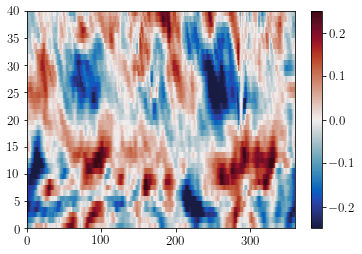

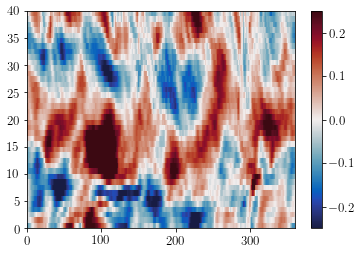

In [8]:
plt.figure()
dmin = -0.25; dmax = 0.25
v1 = s1B_DJF
v2 = s1BM2_DJF
q = plt.pcolormesh(v1-v2, cmap = cm.balance, vmin = dmin, vmax = dmax)
print(np.nanmean(v1-v2))

plt.colorbar(q)

plt.figure()
dmin = -0.25; dmax = 0.25
v1 = s2B_DJF
v2 = s2BM2_DJF
q = plt.pcolormesh(v1-v2, cmap = cm.balance, vmin = dmin, vmax = dmax)
print(np.nanmean(v1-v2))

plt.colorbar(q)

Text(0.5, 0.98, '1980-2019 DJF, 30s-70s climatology, (purple blob is south america/chile)')

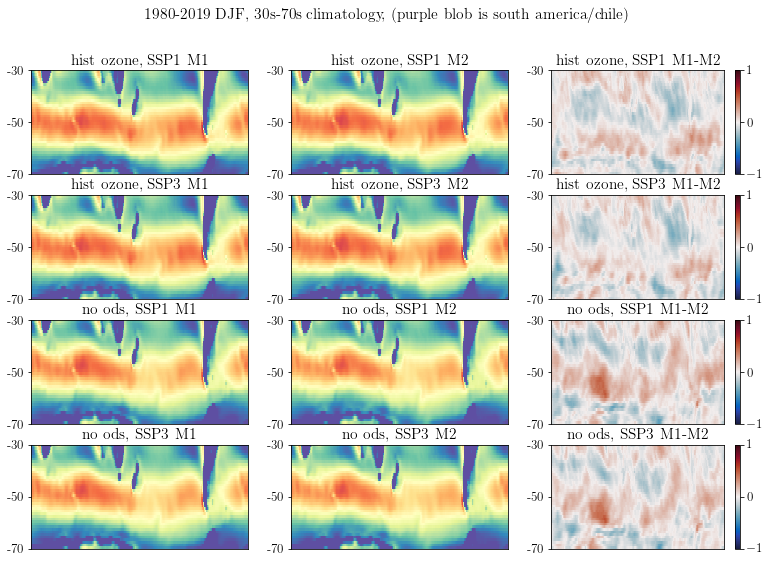

In [9]:
fact = 1.1
fig, axs = plt.subplots(4,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tvmin = 5; tvmax = 11.5
dmin = -1; dmax = 1

ind = 0
axs[0+ind].pcolormesh(s1A_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
axs[1+ind].pcolormesh(s1AM2_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
q =axs[2+ind].pcolormesh(s1A_DJF-s1AM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 3
axs[0+ind].pcolormesh(s1B_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
axs[1+ind].pcolormesh(s1BM2_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
q =axs[2+ind].pcolormesh(s1B_DJF-s1BM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 6
axs[0+ind].pcolormesh(s2A_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
axs[1+ind].pcolormesh(s2AM2_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
q =axs[2+ind].pcolormesh(s2A_DJF-s2AM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 9
axs[0+ind].pcolormesh(s2B_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
axs[1+ind].pcolormesh(s2BM2_DJF, vmin = tvmin, vmax = tvmax, cmap = 'Spectral_r')
q =axs[2+ind].pcolormesh(s2B_DJF-s2BM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

tits = ['hist ozone, SSP1 M1', 'hist ozone, SSP1 M2', 'hist ozone, SSP1 M1-M2',\
        'hist ozone, SSP3 M1', 'hist ozone, SSP3 M2', 'hist ozone, SSP3 M1-M2',\
'no ods, SSP1 M1', 'no ods, SSP1 M2', 'no ods, SSP1 M1-M2',\
        'no ods, SSP3 M1', 'no ods, SSP3 M2', 'no ods, SSP3 M1-M2']

for i in range(0,12):
    axs[i].set_title(tits[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([0,20,40])
    axs[i].set_yticklabels(['-70','-50','-30'])
    
plt.suptitle('1980-2019 DJF, 30s-70s climatology, (purple blob is south america/chile)')

## get spatial trends

In [10]:
import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p

In [11]:
def get_trends(dsnam,seas,yst,yen):
    
    sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    
    tds = xr.open_dataset(f'{sdir}/scen{dsnam}_2d-seas-wspd-ts-{yst}-{yen}.nc')
    w = tds[seas].sel(year=slice(yst,yen)).sel(lat = slice(-90,-30)).values

    mk_slope_ar = np.zeros([60,360])
    mk_p_ar = np.zeros([60,360])
    lin_slope_ar = np.zeros([60,360])
    lin_p_ar = np.zeros([60,360])

    for y in range(0,60):
        if y%10 == 0:
            print(y)
        for x in range(0,360):
            
            ts = w[:,y,x]
            mk_s, mk_p, lin_s, lin_p = give_trends(ts)
            mk_slope_ar[y,x] = mk_s
            mk_p_ar[y,x] = mk_p            
            lin_slope_ar[y,x] = lin_s
            lin_p_ar[y,x] = lin_p     
        
    savenam = f'/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/TRENDS-{dsnam}-{seas}-{yst}-{yen}.nc'
    print(savenam)
    data_vars = {'mk_slope':(['lat', 'lon'], mk_slope_ar),
        'mk_p':(['lat', 'lon'], mk_p_ar),
        'lin_slope':(['lat', 'lon'], lin_slope_ar),
        'lin_p':(['lat', 'lon'], lin_p_ar),
    }
# # define coordinates
    coords = {'lat': (['lat'],tds.lat[0:60]),
            'lon': (['lon'],tds.lon)}

    
    # define global attributes
    attrs = {'made in':'windEval/plottingCode/Fig-spatialtrends.ipynb',
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)

    ds.to_netcdf(savenam)
    return ds



In [12]:
ex = False
if ex:
#     tn = ['MERRA']#,'NCEP-NCAR','NCEP-DOE','ERA5','UKESM']
#     tseas = ['FY','DJF','MAM','JJA','SON']

#     for n in tn:
#         for s in tseas:
#             ds = get_trends(n,s,1980,2019)

    tn = ['2A','2AM2','1A','1AM2','2B','2BM2','1B','1BM2']
    tseas = ['FY','DJF','JJA',]

    for n in tn:
        for s in tseas:
            print(f'{n}, {s}')
            #ds = get_trends(n,s,1980,2019)
            ds = get_trends(n,s,1980,2019)
            ds = get_trends(n,s,2020,2059)
            ds = get_trends(n,s,2060,2099)

In [13]:
w = xr.open_dataset(f'{tdir}/TRENDS-2A-DJF-1980-2019.nc')
s2A_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-2AM2-DJF-1980-2019.nc')
s2AM2_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-1A-DJF-1980-2019.nc')
s1A_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-1AM2-DJF-1980-2019.nc')
s1AM2_DJF = w['lin_slope'].sel(lat = slice(-70,-30))

w = xr.open_dataset(f'{tdir}/TRENDS-2B-DJF-1980-2019.nc')
s2B_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-2BM2-DJF-1980-2019.nc')
s2BM2_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-1B-DJF-1980-2019.nc')
s1B_DJF = w['lin_slope'].sel(lat = slice(-70,-30))
w = xr.open_dataset(f'{tdir}/TRENDS-1BM2-DJF-1980-2019.nc')
s1BM2_DJF = w['lin_slope'].sel(lat = slice(-70,-30))

Text(0.5, 0.98, '1980-2019 DJF, 30s-70s trends, m/s/decade, (purple blob is south america/chile)')

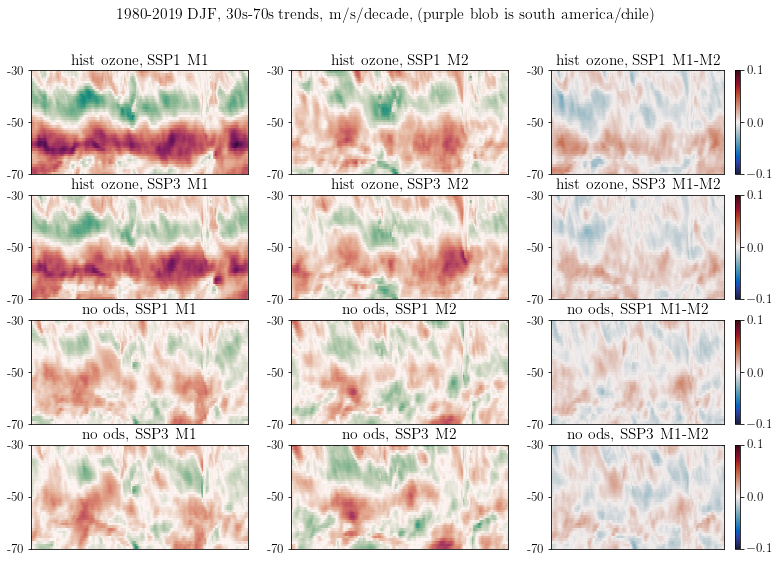

In [14]:
fact = 1.1
fig, axs = plt.subplots(4,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tvmin = -0.05; tvmax = 0.05
dmin = -0.1; dmax = 0.1

ind = 0
axs[0+ind].pcolormesh(s1A_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
axs[1+ind].pcolormesh(s1AM2_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
q =axs[2+ind].pcolormesh(s1A_DJF-s1AM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 3
axs[0+ind].pcolormesh(s1B_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
axs[1+ind].pcolormesh(s1BM2_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
q =axs[2+ind].pcolormesh(s1B_DJF-s1BM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 6
axs[0+ind].pcolormesh(s2A_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
axs[1+ind].pcolormesh(s2AM2_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
q =axs[2+ind].pcolormesh(s2A_DJF-s2AM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

ind = 9
axs[0+ind].pcolormesh(s2B_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
axs[1+ind].pcolormesh(s2BM2_DJF, vmin = tvmin, vmax = tvmax, cmap = cm.curl)
q =axs[2+ind].pcolormesh(s2B_DJF-s2BM2_DJF, vmin = dmin, vmax = dmax, cmap = cm.balance)
plt.colorbar(q, ax = axs[2+ind])

tits = ['hist ozone, SSP1 M1', 'hist ozone, SSP1 M2', 'hist ozone, SSP1 M1-M2',\
        'hist ozone, SSP3 M1', 'hist ozone, SSP3 M2', 'hist ozone, SSP3 M1-M2',\
'no ods, SSP1 M1', 'no ods, SSP1 M2', 'no ods, SSP1 M1-M2',\
        'no ods, SSP3 M1', 'no ods, SSP3 M2', 'no ods, SSP3 M1-M2']

for i in range(0,12):
    axs[i].set_title(tits[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([0,20,40])
    axs[i].set_yticklabels(['-70','-50','-30'])
    #axs[i].set_yticks([])
    
plt.suptitle('1980-2019 DJF, 30s-70s trends, m/s/decade, (purple blob is south america/chile)')

## timeseries

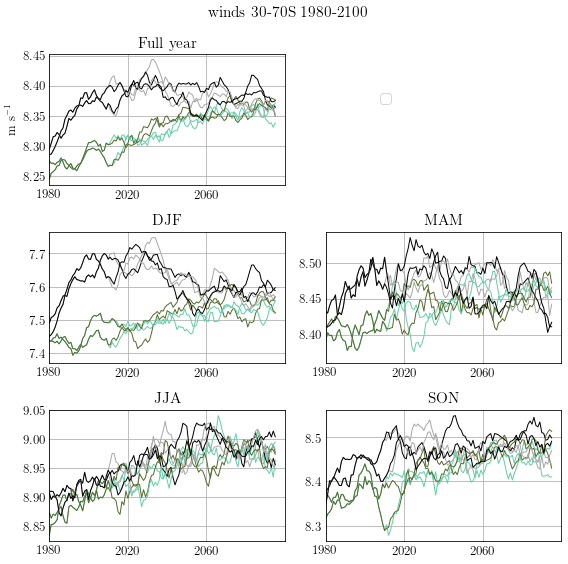

In [15]:
tlat = '30-70S'
xmi = 1980
xma = 2100
xsi = 40

scens = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
scens = ['2A','2AM2','2AEM','1A','1AM2','1AEM','2B','2BM2','2BEM','1B','1BM2','1BEM']
stl = ['1AEM','2AEM','1BEM','2BEM']
#scens = ['1A','2A','1B','2B']

scens = ['2AM2','2BM2','1A','1B','2A','2B','1AM2','1BM2',]#'1AEM','2AEM','1BEM','2BEM']
#scens = ['1AEM','2AEM','1BEM','2BEM']

fact = 1
fig, axs = plt.subplots(3,2, figsize=(8*fact, 8*fact), sharex=False, sharey=False)
axs = axs.ravel()


ts = ['DJF','MAM','JJA','SON']

for s in scens:
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    td = xr.open_dataset(f'{tdir}/scen{s}_UKESM_{tlat}_mean_wspd_ts_1950-2099.nc')
    g = td.groupby('time_counter.year').mean()
    
    tv_rol = g.rolling(year=10, center=True).mean()
    
    #axs[0].plot(g.year,g.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['linewidth'],)
    if s in stl:
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'], label = m3dict[s]['name'])    
    else:
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'],)

    
    
    for i in range(0,4):
        g = td.sel(time_counter=(td['time_counter.season'] == ts[i])).groupby('time_counter.year').mean()
        tv_rol = g.rolling(year=10, center=True).mean()
        axs[i+2].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['linewidth'],)
    
    axs[1].axis('off')
    
tmin = [9.1,8.32,9.2,9.55,9.19]
tits = ['Full year','DJF','MAM','JJA','SON']
ofs = 0.6
ind = 0
for i in range(0,6):

    if i != 1:
        axs[i].set_xlim([xmi,xma])
        axs[i].set_xticks(np.arange(xmi,xma,xsi))
        #axs[i].set_xticklabels([])
        #axs[i].set_ylim([tmin[ind],tmin[ind]+ofs])
        axs[i].tick_params(axis='x', length=0.5)
        axs[i].tick_params(axis='y', length=0.5)
        axs[i].grid()
        
        axs[i].set_title(tits[ind])
        ind = ind+1
        
axs[0].set_ylabel('m s$^{-1}$')
# axs[4].set_xticklabels(np.arange(1980,2140,40))
# axs[5].set_xticklabels(np.arange(1980,2140,40))
        
handles, labels = axs[0].get_legend_handles_labels()  # Collect handles and labels from a subplot


fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.67, 0.82))
plt.suptitle(f'winds {tlat} {xmi}-{xma}')

plt.tight_layout()


fig.savefig(f'./plts/UKESM3M/ts_3M_{tlat}_{xmi}-{xma}-full.png')
    # for i in range(0,6):
    #     axs[i].set_xticks([])
    #     axs[i].set_yticks([])
    #axs[0].plot(g.year,g.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['color'],)

### 

## random code for projecting trends

In [16]:

plt.rcParams['hatch.color'] = 'k'
plt.rcParams['hatch.linewidth'] = 0.3

def plot_southern(fig, ax1, lons, lats, tdat, sigdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    is_sig_mk = np.copy(sigdat)
    is_sig_mk[is_sig_mk>0.05] = 2
    is_sig_mk[is_sig_mk<=0.05] = 1
    is_sig_mk[is_sig_mk == 2] = 0

    
    ax1.contourf(
    lons, lats, is_sig_mk,
    transform=ccrs.PlateCarree(),
    colors='grey',
    levels=[.5, 1.5],
    
    hatches=['////'], lw=0.1, alpha = 0.05
)
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0

    if cbr:
        
        cbar_ax = fig.add_axes([0.2, 0.06, .6, .03]) #left, bottom, width, height
        fig.colorbar(mesh, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

    return cb


2
3
4
5


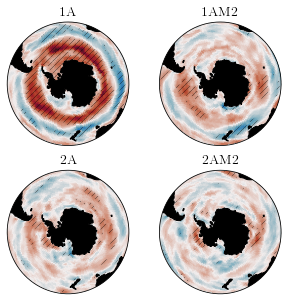

In [17]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
n = ['UKESM','UKESM_NOZONE']
seas = ['FY','DJF','JJA']#,'JJA','SON',]

fact = 0.5
fig = plt.figure(figsize=[10*fact, 10*fact])
tcm = cm.balance

botbound = -0.5
topbound = 0.5
tint = 0.2
tcm = cm.balance
tcbr = True
ind = 1
yst = 1980; yen = 2019
seas = 'DJF'
tseas = seas

dsnams = ['1A','1AM2','2A','2AM2']

for dsnam in dsnams:
        
    ax1 = fig.add_subplot(2, 2, ind, projection=ccrs.Orthographic(0, -90))

    w = xr.open_dataset(f'{sdir}/TRENDS-{dsnam}-{seas}-{yst}-{yen}.nc')
    test = w.lin_slope*10
    sig = w.lin_p
    lons = w.lon
    lats = w.lat

    if ind < 6:
        tcbr = False
    else:
        tcbr = True
    tit = ''
    if ind < 4 :
        tit = f'{tseas}'
    bc = plot_southern(fig, ax1, lons, lats, test, sig, botbound, 
                  topbound, np.arange(botbound,topbound,tint), fs = 14, 
                  tit =dsnam, cbarlab = 'm/s', tcmap = tcm, lm = True, cbr = tcbr)
    ind = ind+1
    print(ind)
        

## make ensemble means

In [18]:
ex = False 

def make_ensemble_avg(e1,e2, tlat = '40-60'):
    
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    e1d = xr.open_dataset(f'{tdir}/scen{e1}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    e2d = xr.open_dataset(f'{tdir}/scen{e2}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')

    # Compute the average of the 'wspd10m' variable across the datasets
    wspd10m_avg = (e1d['wspd10m'] + e2d['wspd10m']) / 2

    # Create a new dataset with the averaged variable
    d4 = xr.Dataset({'wspd10m': wspd10m_avg})

    # Optionally, copy attributes from one of the datasets to the new one
    d4['wspd10m'].attrs = e1d['wspd10m'].attrs
    d4.attrs = {"made in": 'windEval/plottingCode/Fig-attribution3M.ipynb'}
    
    d4.to_netcdf(f'{tdir}/scen{e1}EM_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
    print('done')
    
    return d4

if ex:
    d4 = make_ensemble_avg('1A','1AM2', tlat = '30-70')
    d4 = make_ensemble_avg('1B','1BM2', tlat = '30-70')
    d4 = make_ensemble_avg('2A','2AM2', tlat = '30-70')
    d4 = make_ensemble_avg('2B','2BM2', tlat = '30-70')
# # Save or further process the new dataset
# print(d4)

## get ts trends out into csvs

In [19]:
def get_ukesm3m(y1,y2, tlat = '40-60'):
    print(f'{y1}-{y2}')
    data = np.zeros([5,12])
    data2 = np.zeros([5,12])
    sig = np.zeros([5,8])

    ems = ['2A','2AM2','2AEM','1A','1AM2','1AEM',\
           '2B','2BM2','2BEM','1B','1BM2','1BEM']

    emf = ['2AM3','1AM3','2BM3','1BM3',]

    for m in range(0,len(ems)):

        tm = (ems[m])
        print(tm)

        if tm in emf:
            pass
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
            g = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values

            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')        
                g = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M_{tlat}S-trendsig-{y1}-{y2}.csv')

        
def get_ukesm3mo3(y1,y2, tlat = '40-60', verbose = False):
    print(f'{y1}-{y2}')
    data = np.zeros([5,6])
    data2 = np.zeros([5,6])

    ems = ['1A','1AM2','1AEM','1B','1BM2','1BEM']
    ems2 = ['2A','2AM2','2AEM','2B','2BM2','2BEM']
    emf = ['1AM3','1BM3']

    for m in range(0,len(ems)):

        tm = (ems[m])
        tm2 = (ems2[m])
        print(f'{tm}-{tm2}')

        if tm in emf:
            pass
        
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
            g1 = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')
            g2 = td2.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            g = g1-g2
            if verbose:
                print(g)
            
            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            if verbose:
                print(f'{lin_slope} p{lin_p}')
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')        
                g1 = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_{tlat}S_mean_wspd_ts_1950-2099.nc')        
                g2 = td2.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values                 
                g = g1-g2
                
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M_{tlat}S-O3trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M_{tlat}S-O3trendsig-{y1}-{y2}.csv')
    
    

In [20]:
ex = False


if ex:
#     get_ukesm3mo3(1980,2019, tlat = '40-60')
#     get_ukesm3mo3(2020,2059, tlat = '40-60')
#     get_ukesm3mo3(2060,2099, tlat = '40-60')

#     get_ukesm3m(1980,2019, tlat = '40-60')
#     get_ukesm3m(2020,2059, tlat = '40-60')
#     get_ukesm3m(2060,2099, tlat = '40-60')    
    
#     get_ukesm3mo3(1950,1999, tlat = '40-60')
#     get_ukesm3mo3(2000,2049, tlat = '40-60')
#     get_ukesm3mo3(2050,2099, tlat = '40-60')

#     get_ukesm3m(1950,1999, tlat = '40-60')
#     get_ukesm3m(2000,2049, tlat = '40-60')
#     get_ukesm3m(2050,2099, tlat = '40-60')    
    
    ## 
    get_ukesm3mo3(1980,2019, tlat = '30-70')
    get_ukesm3mo3(2020,2059, tlat = '30-70')
    get_ukesm3mo3(2060,2099, tlat = '30-70')

    get_ukesm3m(1980,2019, tlat = '30-70')
    get_ukesm3m(2020,2059, tlat = '30-70')
    get_ukesm3m(2060,2099, tlat = '30-70')    
    
    get_ukesm3mo3(1950,1999, tlat = '30-70')
    get_ukesm3mo3(2000,2049, tlat = '30-70')
    get_ukesm3mo3(2050,2099, tlat = '30-70')

    get_ukesm3m(1950,1999, tlat = '30-70')
    get_ukesm3m(2000,2049, tlat = '30-70')
    get_ukesm3m(2050,2099, tlat = '30-70')    

## visualize trends seaborn

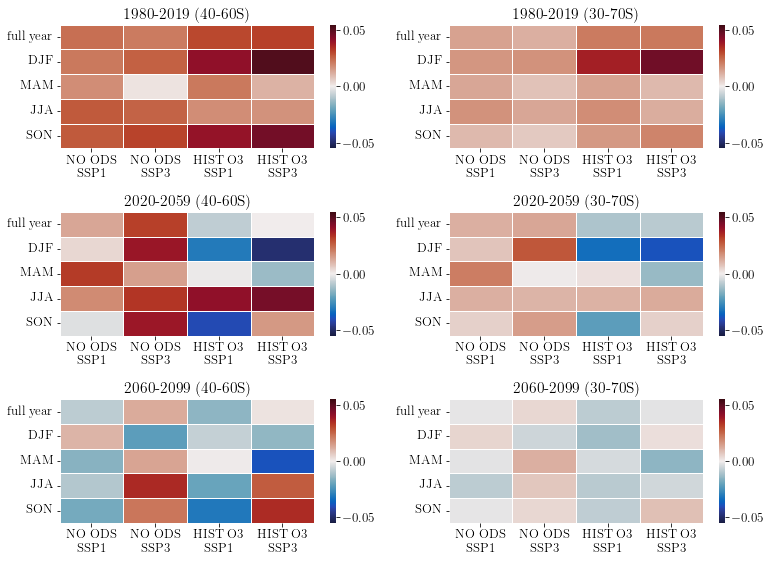

In [21]:
import seaborn as sns
emonly = True


fact = 1
fig, axs = plt.subplots(3,2, figsize=(11*fact, 8*fact), sharex=False, sharey=False)
axs = axs.ravel()

vmin = -0.055; vmax = 0.055; tcmap = cm.balance
y1 = 1980; y2 = 2019; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[0])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[1])


y1 = 2020; y2 = 2059; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[2])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[3])


y1 = 2060; y2 = 2099; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[4])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=False, vmin = vmin, vmax = vmax, ax = axs[5])

tits = ['1980-2019 (40-60S)','1980-2019 (30-70S)',\
        '2020-2059 (40-60S)','2020-2059 (30-70S)',\
        '2060-2099 (40-60S)','2060-2099 (30-70S)',]

for i in range(0,6):
    axs[i].set_title(tits[i])
    
plt.tight_layout()
fig.savefig('./plts/heatmap_1980-2100.png')

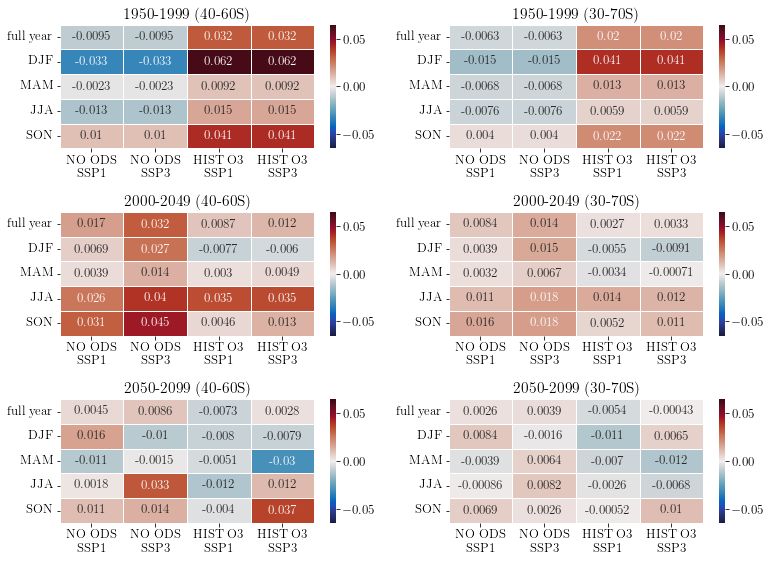

In [22]:
import seaborn as sns
emonly = True


fact = 1
fig, axs = plt.subplots(3,2, figsize=(11*fact, 8*fact), sharex=False, sharey=False)
axs = axs.ravel()

vmin = -0.065; vmax = 0.065; tcmap = cm.balance
y1 = 1950; y2 = 1999; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[0])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[1])


y1 = 2000; y2 = 2049; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[2])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[3])


y1 = 2050; y2 = 2099; 

tlat = '40-60'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[4])

tlat = '30-70'
df = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-{y1}-{y2}.csv', index_col=0)
if emonly: df = df[['2AEM','2BEM','1AEM','1BEM']]#,
df = df.rename(columns={"2AEM": "NO ODS \n SSP1", "2BEM": "NO ODS \n SSP3", "1AEM": "HIST O3 \n SSP1", "1BEM": "HIST O3 \n SSP3"})
sns.heatmap(df, cmap=tcmap, linewidths=0.5, annot=True, vmin = vmin, vmax = vmax, ax = axs[5])

tits = ['1950-1999 (40-60S)','1950-1999 (30-70S)',\
        '2000-2049 (40-60S)','2000-2049 (30-70S)',\
        '2050-2099 (40-60S)','2050-2099 (30-70S)',]

for i in range(0,6):
    axs[i].set_title(tits[i])
    
plt.tight_layout()
fig.savefig('./plts/heatmap_1950-2100.png')

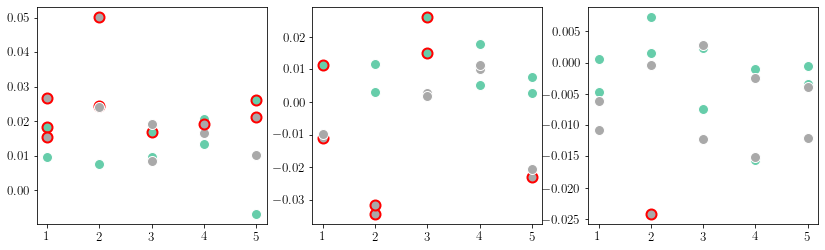

In [23]:
T3m_1950 = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv(f'./plts/UKESM3M_{tlat}S-trendsig-2060-2099.csv', index_col=0)

dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
# df = T3m_1950_2000
# dfs = T3m_1950_2000sig

tplc = np.arange(1,6)

    
seas = ['full year','DJF','MAM','JJA','SON']
ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
#ems = ['2AEM','1AEM','2BEM','1BEM',] 
ems = ['2A','2AM2','1A','1AM2']
#ems = ['2A','2AM2']
emf = ['2AM3','1AM3','2BM3','1BM3',]  
eme = ['2AEM','1AEM','2BEM','1BEM',]  

fact = 1
fig, axs = plt.subplots(1,3, figsize=(14*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for d in range(0,3):
    
    df = dfar[d]
    dfs = dfsar[d]
    
    for i in range(0,len(ems)):

        em = ems[i] 

        for f in range(0,5):

            ms = 10

            ts = seas[f]
            if em in emf:
                pass
            else:

                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                sig = dfs.loc[ts, em]
                #print(f'{em} {tcol} {ts} {value}, {sig}')
                if em in eme: 
                    ms = ms + 3
                    axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol, \
                             label = m3dict[em]['name'], markersize = ms, linestyle = '',\
                            markeredgecolor = 'w')
                else: 

                    axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol,\
                             markersize = ms, linestyle = '', markeredgecolor = 'w')
                if sig != 0:
                     axs[d].plot(tplc[f],value, marker = 'o', markerfacecolor = tcol,\
                             markersize = ms, linestyle = '', markeredgewidth = 2,\
                             markeredgecolor = 'r')               




## make ensemble means (will have to be redone when we have 3 because getting data in a timely fashion is hard for steve)

original is done in extract_ts_3M

In [24]:
ex = False 

def make_ensemble_avg(e1,e2):
    
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    e1d = xr.open_dataset(f'{tdir}/scen{e1}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
    e2d = xr.open_dataset(f'{tdir}/scen{e2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')

    # Compute the average of the 'wspd10m' variable across the datasets
    wspd10m_avg = (e1d['wspd10m'] + e2d['wspd10m']) / 2

    # Create a new dataset with the averaged variable
    d4 = xr.Dataset({'wspd10m': wspd10m_avg})

    # Optionally, copy attributes from one of the datasets to the new one
    d4['wspd10m'].attrs = e1d['wspd10m'].attrs
    d4.attrs = {"made in": 'windEval/plottingCode/Fig-attribution3M.ipynb'}
    
    d4.to_netcdf(f'{tdir}/scen{e1}EM_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
    
    return d4

if ex:
    d4 = make_ensemble_avg('1A','1AM2')
    d4 = make_ensemble_avg('1B','1BM2')
    d4 = make_ensemble_avg('2A','2AM2')
    d4 = make_ensemble_avg('2B','2BM2')
# # Save or further process the new dataset
# print(d4)

## plot 1980-2099 

- monthly pure ts

- yearly, subset by season


In [25]:
td = xr.open_dataset(f'{tdir}/scen{s}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
td

<xarray.Dataset>
Dimensions:       (time_counter: 54000)
Coordinates:
  * time_counter  (time_counter) object 1950-01-01 00:00:00 ... 2099-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...

## 1950-2100

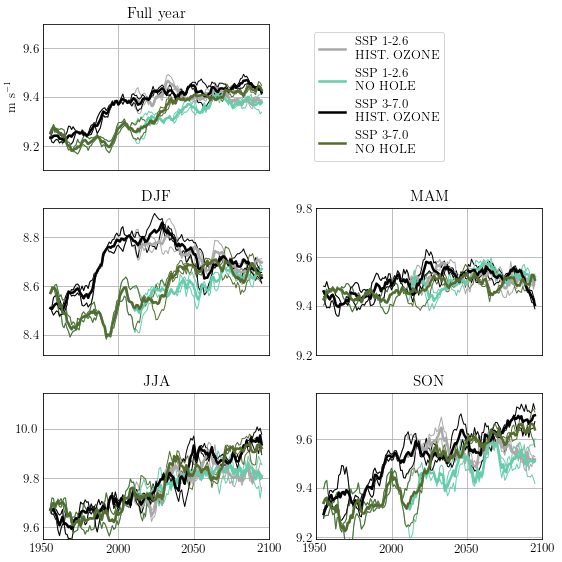

In [26]:


scens = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
scens = ['2A','2AM2','2AEM','1A','1AM2','1AEM','2B','2BM2','2BEM','1B','1BM2','1BEM']
stl = ['1AEM','2AEM','1BEM','2BEM']
#scens = ['1A','2A','1B','2B']

scens = ['2AM2','2BM2','1A','1B','2A','2B','1AM2','1BM2','1AEM','2AEM','1BEM','2BEM']
#scens = ['1AEM','2AEM','1BEM','2BEM']

fact = 1
fig, axs = plt.subplots(3,2, figsize=(8*fact, 8*fact), sharex=False, sharey=False)
axs = axs.ravel()


ts = ['DJF','MAM','JJA','SON']

for s in scens:
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    td = xr.open_dataset(f'{tdir}/scen{s}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
    g = td.groupby('time_counter.year').mean()
    
    tv_rol = g.rolling(year=10, center=True).mean()
    
    #axs[0].plot(g.year,g.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['linewidth'],)
    if s in stl:
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'], label = m3dict[s]['name'])    
    else:
        axs[0].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'],\
                    linewidth = m3dict[s]['linewidth'],)

    
    
    for i in range(0,4):
        g = td.sel(time_counter=(td['time_counter.season'] == ts[i])).groupby('time_counter.year').mean()
        tv_rol = g.rolling(year=10, center=True).mean()
        axs[i+2].plot(tv_rol.year,tv_rol.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['linewidth'],)
    
    axs[1].axis('off')
    
tmin = [9.1,8.32,9.2,9.55,9.19]
tits = ['Full year','DJF','MAM','JJA','SON']
ofs = 0.6
ind = 0
for i in range(0,6):

    if i != 1:
        axs[i].set_xlim([1950,2100])
        axs[i].set_xticks(np.arange(1950,2150,50))
        axs[i].set_xticklabels([])
        axs[i].set_ylim([tmin[ind],tmin[ind]+ofs])
        axs[i].tick_params(axis='x', length=0.5)
        axs[i].tick_params(axis='y', length=0.5)
        axs[i].grid()
        
        axs[i].set_title(tits[ind])
        ind = ind+1
        
axs[0].set_ylabel('m s$^{-1}$')
axs[4].set_xticklabels(np.arange(1950,2150,50))
axs[5].set_xticklabels(np.arange(1950,2150,50))
        
handles, labels = axs[0].get_legend_handles_labels()  # Collect handles and labels from a subplot


fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.67, 0.82))

plt.tight_layout()

fig.savefig('./plts/ts_3M_1950-2100-full.png')
    # for i in range(0,6):
    #     axs[i].set_xticks([])
    #     axs[i].set_yticks([])
    #axs[0].plot(g.year,g.wspd10m, color = m3dict[s]['color'], linewidth = m3dict[s]['color'],)

## get trends and store in datafram

In [27]:
import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


In [28]:
ex = False

def get_ukesm3m(y1,y2):
    print(f'{y1}-{y2}')
    data = np.zeros([5,16])
    data2 = np.zeros([5,16])
    sig = np.zeros([5,16])

    ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM',\
           '2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']

    emf = ['2AM3','1AM3','2BM3','1BM3',]

    for m in range(0,len(ems)):

        tm = (ems[m])
        print(tm)

        if tm in emf:
            pass
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values

            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M-trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M-trendsig-{y1}-{y2}.csv')

        
def get_ukesm3mo3(y1,y2, verbose = False):
    print(f'{y1}-{y2}')
    data = np.zeros([5,8])
    data2 = np.zeros([5,8])

    ems = ['1A','1AM2','1AM3','1AEM','1B','1BM2','1BM3','1BEM']
    ems2 = ['2A','2AM2','2AM3','2AEM','2B','2BM2','2BM3','2BEM']
    emf = ['1AM3','1BM3']

    for m in range(0,len(ems)):

        tm = (ems[m])
        tm2 = (ems2[m])
        print(f'{tm}-{tm2}')

        if tm in emf:
            pass
        
        else:
            tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
            td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g1 = td.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')
            g2 = td2.wspd10m.groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values
            g = g1-g2
            if verbose:
                print(g)
            
            mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
            if verbose:
                print(f'{lin_slope} p{lin_p}')
            data[0,m] = lin_slope*10; data2[0,m] = lin_slope*10
            if lin_p > 0.05: data2[0,m] = 0

            ss = ['DJF','MAM','JJA','SON']
            for i in range(1,5):
                ts = ss[i-1]
                td = xr.open_dataset(f'{tdir}/scen{tm}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g1 = td.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values 
                td2 = xr.open_dataset(f'{tdir}/scen{tm2}_UKESM_40-60S_mean_wspd_ts_1950-2099.nc')        
                g2 = td2.wspd10m.sel(time_counter=(td['time_counter.season'] == ts)).\
                groupby('time_counter.year').mean().sel(year=slice(y1,y2)).values                 
                g = g1-g2
                
                mk_slope, mk_p, lin_slope, lin_p = give_trends(g)
                data[i,m] = lin_slope*10; data2[i,m] = lin_slope*10
                if lin_p > 0.05: data2[i,m] = 0

        df = pd.DataFrame(data, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])
        df2 = pd.DataFrame(data2, columns=ems,\
                          index  = ['full year','DJF','MAM', 'JJA', 'SON',])

        df.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df.to_csv(f'./plts/UKESM3M-O3trend-{y1}-{y2}.csv')
        df2.attrs = {"made in": 'plottingCode/Fig-attribution3M.ipynb'}
        df2.to_csv(f'./plts/UKESM3M-O3trendsig-{y1}-{y2}.csv')
    
    

## get out the ozone attribution and main trends into df

In [29]:
ex = False


if ex:
    get_ukesm3mo3(1980,2019)
    get_ukesm3mo3(2020,2059)
    get_ukesm3mo3(2060,2099)

    get_ukesm3m(1980,2019)
    get_ukesm3m(2020,2059)
    get_ukesm3m(2060,2099)    
    
    get_ukesm3mo3(1950,1999)
    get_ukesm3mo3(2000,2049)
    get_ukesm3mo3(2050,2099)

    get_ukesm3m(1950,1999)
    get_ukesm3m(2000,2049)
    get_ukesm3m(2050,2099)    

## horrible overview dot plot

In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1950-1999.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1950-1999.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2000-2049.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2000-2049.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2050-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2050-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
# df = T3m_1950_2000
# dfs = T3m_1950_2000sig

tplc = np.arange(1,6)
tms = 20
    
seas = ['full year','DJF','MAM','JJA','SON']
ems = ['2A','2AM2','2AM3','2AEM','1A','1AM2','1AM3','1AEM','2B','2BM2','2BM3','2BEM','1B','1BM2','1BM3','1BEM']
ems = ['2AEM','1AEM','2BEM','1BEM',] 
#ems = ['2A','2AM2','2AM3','2AEM',]
#ems = ['2A','2AM2']
emf = ['2AM3','1AM3','2BM3','1BM3',]  
eme = ['2AEM','1AEM','2BEM','1BEM',]  

fact = 0.9
fig, axs = plt.subplots(1,3, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmarker = 'o'
for d in range(0,3):
    
    df = dfar[d]
    dfs = dfsar[d]
    
    for i in range(0,len(ems)):

        em = ems[i] 

        for f in range(0,5):


            ts = seas[f]
            if em in emf:
                pass
            else:

                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                sig = dfs.loc[ts, em]
                #print(f'{em} {tcol} {ts} {value}, {sig}')
                if em in eme: 
                    tmarker = '*'
                    ms = tms + 20
                    axs[d].plot(tplc[f],value, marker = tmarker, markerfacecolor = tcol, \
                             label = m3dict[em]['name'], markersize = ms, linestyle = '',\
                            markeredgecolor = 'w')
                    if sig != 0:
                         axs[d].plot(tplc[f],value, marker = tmarker, markerfacecolor = tcol,\
                                 markersize = ms, linestyle = '', markeredgewidth = 2,\
                                 markeredgecolor = 'r')       
                else: 
                    ms = tms
                    tmarker = 'o'
                    axs[d].plot(tplc[f],value, marker = tmarker, markerfacecolor = tcol,\
                             markersize = ms, linestyle = '', markeredgecolor = 'w')
                    if sig != 0:
                         axs[d].plot(tplc[f],value, marker = tmarker, markerfacecolor = tcol,\
                                 markersize = ms, linestyle = '', markeredgewidth = 2,\
                                 markeredgecolor = 'r')               


tits = ['1950-2000','2000-2050','2050-2100']#,
for i in range(0,3):
    axs[i].set_ylim([-0.04,0.08])
    axs[i].axhline(y=0)
    axs[i].set_xticks([1,2,3,4,5])
    axs[i].set_xticklabels(['FY','DJF','MAM','JJA','SON'])
    axs[i].set_title(tits[i])
    
plt.suptitle('trends (m/s/dec) in the historical (black/grey) and no-ODS (green/lightgreen) winds 40-60S. \n lighter colour (grey/lightgreen) denotes SSP1')

Text(0.5, 0.98, 'trends (m/s/dec) in the historical (black/grey) and no-ODS (green/lightgreen) winds 40-60S. \n lighter colour (grey/lightgreen) denotes SSP1')

In [ ]:

def get_seasplot(dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07]):
    twidth = 0.2
    fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d].bar(2+(twidth/2), vtot, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 

                axs[d].bar(2+(twidth*m), vtot, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d].set_xticks([1.1,2.1])
        axs[d].set_xticklabels(['GHG only', 'GHG + O$_3$'])
        axs[d].axhline(y = 0)
        axs[d].set_ylim(ylims)
        axs[d].tick_params(axis='x', length=0.5)
        axs[d].tick_params(axis='y', length=0.5)
        axs[0].set_ylabel('m $^{-1}$')
        axs[d].set_title(tits[d])

    fig.suptitle(ts, y = 1.05)
    fig.savefig(f'./plts/UKESM3M/{tit}_{ts}.jpg')
    


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1950-1999.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1950-1999.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2000-2049.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2000-2049.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2050-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2050-2099.csv', index_col=0)
    
dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
get_seasplot(dfar,dfsar,'1950-2100','full year')
get_seasplot(dfar,dfsar,'1950-2100','DJF')
get_seasplot(dfar,dfsar,'1950-2100','MAM')
get_seasplot(dfar,dfsar,'1950-2100','JJA')
get_seasplot(dfar,dfsar,'1950-2100','SON')

In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
tylims = [-0.055,0.055]
get_seasplot(dfar,dfsar,'1980-2100','full year',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','DJF',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','MAM',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','JJA',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot(dfar,dfsar,'1980-2100','SON',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)

In [ ]:

def get_seasplot_diff(dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07]):
    twidth = 0.2
    fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d].bar(2+(twidth/2), vtot-value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 

                axs[d].bar(2+(twidth*m), vtot-value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d].set_xticks([1.1,2.1])
        axs[d].set_xticklabels(['GHG only', 'O$_3$ only'])
        axs[d].axhline(y = 0)
        axs[d].set_ylim(ylims)
        axs[d].tick_params(axis='x', length=0.5)
        axs[d].tick_params(axis='y', length=0.5)
        axs[0].set_ylabel('m $^{-1}$')
        axs[d].set_title(tits[d])

    fig.suptitle(ts, y = 1.05)
    fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')
    


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]
tylims = [-0.095,0.055]
get_seasplot_diff(dfar,dfsar,'1980-2100','full year',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','DJF',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','MAM',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','JJA',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff(dfar,dfsar,'1980-2100','SON',tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)

In [ ]:

def get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0):
    axs = axs.ravel()
    twidth = 0.2
    #fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d+os].bar(2+(twidth/2), vtot-value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if (vtots != 0): tedge = 2, 

                axs[d+os].bar(2+(twidth*m), vtot-value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d+os].set_xticks([1.1,2.1])
        axs[d+os].set_xticklabels(['GHG only', 'O$_3$ only'])
        axs[d+os].axhline(y = 0)
        axs[d+os].set_ylim(ylims)
        axs[d+os].tick_params(axis='x', length=0.5)
        axs[d+os].tick_params(axis='y', length=0.5)
        if d == 0: axs[d+os].set_ylabel(f'{ts} \n m/s /dec')
        if os == 0:
            axs[d].set_title(tits[d])

    #fig.suptitle(ts, y = 1.05)
    #fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')


In [ ]:

def get_seasplot_1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0):
    axs = axs.ravel()
    twidth = 0.2
    #fig, axs = plt.subplots(1,3, figsize=(14*fact, 2.5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

    ghg = ['2AEM','2BEM']
    ghgo3 = ['1AEM','1BEM']
    

    for d in range(0,3):

        df = dfar[d]
        dfs = dfsar[d]

        ## warming only

        for m in range(0,len(ghg)):
            tedge = 0
            if d == 0:
                em = ghg[0]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth/2), value, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')

            else:
                em = ghg[m]
                tcol = m3dict[em]['color']
                value = df.loc[ts, em]
                values = dfs.loc[ts, em]
                if values != 0: tedge = 2,
                axs[d+os].bar(1+(twidth*m), value, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        for m in range(0,len(ghgo3)):
            tedge = 0
            if d == 0:
                em = ghgo3[0]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if vtots != 0: tedge = 2, 
                axs[d+os].bar(2+(twidth/2), vtot, width = twidth*2, color = tcol, lw = tedge, edgecolor = 'r')
            else:
                em = ghgo3[m]
                tcol = m3dict[em]['color']
                vtot = df.loc[ts, em]
                vtots = dfs.loc[ts, em]
                if (vtots != 0): tedge = 2, 

                axs[d+os].bar(2+(twidth*m), vtot, width = twidth, color = tcol, lw = tedge, edgecolor = 'r')

        axs[d+os].set_xticks([1.1,2.1])
        axs[d+os].set_xticklabels(['GHG only', 'O$_3$ +GHG'])
        axs[d+os].axhline(y = 0)
        #axs[d+os].set_ylim(ylims)
        axs[d+os].tick_params(axis='x', length=0.5)
        axs[d+os].tick_params(axis='y', length=0.5)
        if d == 0: axs[d+os].set_ylabel(f'{ts} \n m/s /dec')
        if os == 0:
            axs[d].set_title(tits[d])

    #fig.suptitle(ts, y = 1.05)
    #fig.savefig(f'./plts/UKESM3M/{tit}_{ts}_o3diff.jpg')


In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]

fig, axs = plt.subplots(5,3, figsize=(14*fact, 2.5*5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

# get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0)

get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','full year', tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','DJF', ylims = tylims, os = 6)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','MAM', ylims = tylims, os = 9)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','JJA', ylims = tylims, os = 12)
get_seasplot_diff1f(fig, axs, dfar,dfsar,'1980-2100','SON', ylims = tylims, os = 3)

In [ ]:
T3m_1950 = pd.read_csv('./plts/UKESM3M-trend-1980-2019.csv', index_col=0)
T3m_1950sig = pd.read_csv('./plts/UKESM3M-trendsig-1980-2019.csv', index_col=0)
T3m_2000 = pd.read_csv('./plts/UKESM3M-trend-2020-2059.csv', index_col=0)
T3m_2000sig = pd.read_csv('./plts/UKESM3M-trendsig-2020-2059.csv', index_col=0)
T3m_2050 = pd.read_csv('./plts/UKESM3M-trend-2060-2099.csv', index_col=0)
T3m_2050sig = pd.read_csv('./plts/UKESM3M-trendsig-2060-2099.csv', index_col=0)


dfar = [T3m_1950,T3m_2000,T3m_2050]
dfsar = [T3m_1950sig,T3m_2000sig,T3m_2050sig]

fig, axs = plt.subplots(5,3, figsize=(14*fact, 2.5*5*fact), facecolor='w', edgecolor='k', sharex = True, sharey = True)

# get_seasplot_diff1f(fig, axs, dfar,dfsar,tit,ts, tits = ['1950-2000','2000-2050','2050-2100'],ylims = [-0.035,0.07], os = 0)

get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','full year', tits = ['1980-2020','2020-2060','2060-2100'], ylims = tylims)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','DJF', ylims = tylims, os = 6)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','MAM', ylims = tylims, os = 9)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','JJA', ylims = tylims, os = 12)
get_seasplot_1f(fig, axs, dfar,dfsar,'1980-2100','SON', ylims = tylims, os = 3)

In [ ]:
axs[0][0].plot(1,1,'r*')

In [ ]:
np.shape(axs)

In [ ]:
axs = axs.ravel()
np.shape(axs)